# HW 5
# Mohammad Hosein Ashoori - 97149068

In [121]:
import pandas as pd
from sklearn import preprocessing, decomposition
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import scipy.stats as stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

UsageError: Line magic function `%` not found.


In [2]:
import random 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

In [66]:
penguins = pd.read_csv("files/penguins.csv")
display(penguins.head())
penguins.info()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


# 1 - Remove Missing Values

In [77]:
penguins_nonNull = penguins.dropna()
penguins_nonNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


# 3 - Normalization on data

In [98]:
penguins_nonNull_normal= penguins_nonNull[:]
# penguins_nonNull_normal[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].apply(stats.zscore)
penguins_nonNull_normal = pd.concat([
    penguins_nonNull_normal.select_dtypes(include=[np.number]).apply(stats.zscore),
    penguins_nonNull[['species','island','sex']]],axis=1)

encoder = preprocessing.OrdinalEncoder()
penguins_nonNull_normal.insert( 0, 'normal_species' ,encoder.fit_transform(penguins_nonNull_normal[['species']]))
penguins_nonNull_normal.insert( 0, 'normal_island' ,encoder.fit_transform(penguins_nonNull_normal[['island']]))
penguins_nonNull_normal.insert( 0, 'normal_sex' ,encoder.fit_transform(penguins_nonNull_normal[['sex']]))
penguins_nonNull_normal=penguins_nonNull_normal.drop(['species','island','sex'],axis=1)

penguins_nonNull_normal.head(10)

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,1.0,2.0,0.0,-0.896042,0.780732,-1.426752,-0.568475
1,0.0,2.0,0.0,-0.822788,0.119584,-1.069474,-0.506286
2,0.0,2.0,0.0,-0.676280,0.424729,-0.426373,-1.190361
4,0.0,2.0,0.0,-1.335566,1.085877,-0.569284,-0.941606
5,1.0,2.0,0.0,-0.859415,1.747026,-0.783651,-0.692852
6,0.0,2.0,0.0,-0.932669,0.323014,-1.426752,-0.723946
7,1.0,2.0,0.0,-0.877728,1.238450,-0.426373,0.582014
12,0.0,2.0,0.0,-0.529772,0.221299,-1.355296,-1.252549
13,1.0,2.0,0.0,-0.987609,2.052171,-0.712196,-0.506286
14,1.0,2.0,0.0,-1.720150,2.001313,-0.212006,0.239977


# 2 - Split data to test and train

In [99]:
X_train, X_test = train_test_split(penguins_nonNull_normal, test_size=.2,shuffle=True)
display("Train")
display(X_train)
display("Test")
display(X_test)

'Train'

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
114,0.0,0.0,0.0,-0.804474,1.797883,-0.712196,-0.381909
46,1.0,1.0,0.0,-0.529772,0.933305,-1.355296,-0.972701
24,1.0,0.0,0.0,-0.950982,0.017869,-1.498207,-0.506286
92,0.0,1.0,0.0,-1.830031,-0.032989,-1.140929,-1.003795
158,0.0,1.0,1.0,0.385904,0.526444,-1.641118,-1.190361
...,...,...,...,...,...,...,...
86,1.0,1.0,0.0,-1.408820,1.187592,-0.783651,-0.506286
149,1.0,1.0,0.0,-1.134117,0.475587,-0.569284,-0.568475
322,0.0,0.0,2.0,0.587352,-0.846709,1.002739,0.955146
330,0.0,0.0,2.0,1.191698,-0.999282,1.074194,0.986240


'Test'

,normal_sex,normal_island,normal_species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
217,1.0,1.0,1.0,1.026876,0.526444,-0.569284,-0.537380
139,1.0,1.0,0.0,-0.786161,0.373872,-0.569284,0.053411
194,1.0,1.0,1.0,1.264952,0.984162,-0.354918,-0.817229
283,1.0,0.0,2.0,1.887611,-0.744994,2.146028,1.794692
48,0.0,1.0,0.0,-1.463761,0.373872,-0.783651,-0.941606
...,...,...,...,...,...,...,...
309,1.0,0.0,2.0,1.484714,-0.083846,2.074573,1.670315
132,0.0,1.0,0.0,-1.317253,0.679017,-0.569284,-0.879418
173,1.0,1.0,1.0,0.825428,0.170442,-0.712196,-1.003795
227,1.0,0.0,2.0,0.495785,-0.948425,1.288561,1.234995


# 4 - KNN with K==5

In [62]:
from sklearn.neighbors import KNeighborsClassifier 

In [100]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(
        X_train.loc[:, X_train.columns!='normal_species'],
        X_train[['normal_species']])



c:\Users\Cena\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

# 5 - Confusion Matrix

<AxesSubplot:>

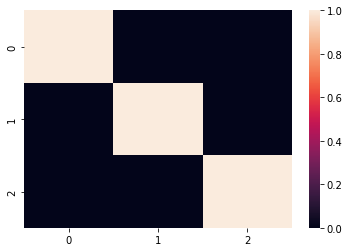

In [118]:
test = classifier.predict(X_test.loc[:, X_train.columns!='normal_species'])
result = confusion_matrix(X_test[['normal_species']],test)
sns.heatmap(result, vmin=0, vmax=1)


# 6 - Test for K from 1 to 40

In [ ]:
dic = {}
# for k in range (1):
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(
    X_train.loc[:, X_train.columns!='normal_species'],
    X_train[['normal_species']])
test = classifier.predict(X_test.loc[:, X_train.columns!='normal_species'])
result = classification_report(X_test[['normal_species']],test)

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(
        X_train.loc[:, X_train.columns!='normal_species'],
        X_train[['normal_species']])
        
    pred_i = knn.predict(X_test.loc[:, X_train.columns!='normal_species'])
    error.append(np.mean(pred_i != X_test['normal_species']))

Text(0, 0.5, 'Mean Error')

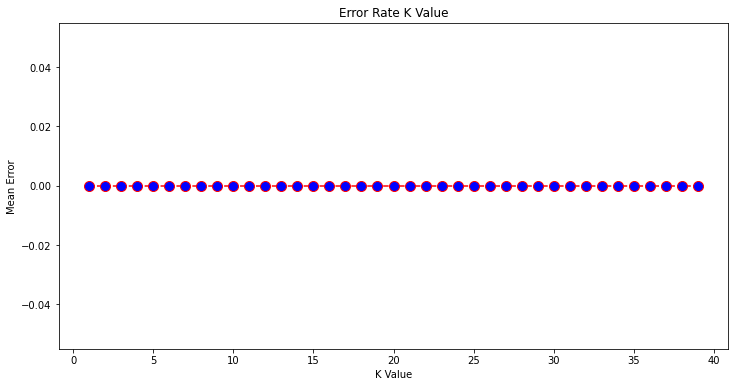

In [140]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# 2 - 1

# Tap on [This](https://medium.com/secure-and-private-ai-math-blogging-competition/spam-detection-and-filtering-with-naive-bayes-algorithm-f6c2ac181174)  Link